In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dsname = "/home/morgan/Git/foundry-data-saver/test-data/ciwe/dvs/40um_bicarbonate_singleramp/discreet/Anyka_25C_8hrHold_preheat-VersogenBC 40um-2024-05-13 08-40-33.xls"

In [3]:
tmp = pd.read_excel(dsname, 
       sheet_name = "DVS Data", 
       index_col = 0,
       header= None, 
       usecols= [0,1])

num_rows = tmp.loc['Data Start Row:', 1]
df = pd.read_excel(dsname, sheet_name = "DVS Data", 
                   skiprows = (num_rows - 2)) #(header will one be before data start row and don't skip it : ))


In [4]:
df.head()

,Time [minutes],Mass [mg],Delta Mass [%],dm/dt [%/minute],Target Incubator Temp. [celsius],Measured Incubator Temp. [celsius],Target Preheater Temp. [celsius],Measured Preheater Temp. [celsius],Sorption Temp. [celsius],Target Partial Pressure (Solvent A) [%],...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Target Chiller Temp. [celsius],Measured Chiller Temp. [celsius],Measured Chiller Internal Temp. [celsius],Chiller State,Gas Concentration (Sensor A) [ppm],Gas Concentration (Sensor B) [ppm]
0,0.00,10.1631,203.262,229.2424,25,23.5,25,27.0,24.0,0,...,0,0,0,0,-10,0,0,Off,0,0
1,0.17,10.1476,202.952,189.8174,25,23.5,25,26.8,24.0,0,...,0,0,0,0,-10,0,0,Off,0,0
2,0.33,10.1302,202.604,146.6210,25,23.5,25,26.6,24.0,0,...,0,0,0,0,-10,0,0,Off,0,0
3,0.50,10.1110,202.220,99.6460,25,23.5,25,26.4,24.0,0,...,0,0,0,0,-10,0,0,Off,0,0
4,0.67,10.0909,201.818,53.2365,25,23.4,25,26.3,23.9,0,...,0,0,0,0,-10,0,0,Off,0,0


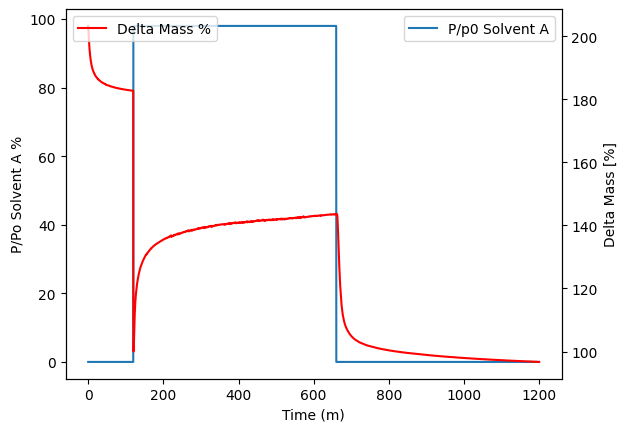

In [25]:
fig,ax = plt.subplots()
ax.plot(df['Time [minutes]'], df['Target Partial Pressure (Solvent A) [%]'], label = 'P/p0 Solvent A')

ax2 = ax.twinx()
ax2.plot(df['Time [minutes]'], df['Delta Mass [%]'], "r", label = 'Delta Mass %')

ax.set_xlabel("Time (m)")
ax.set_ylabel("P/Po Solvent A %")
ax2.set_ylabel("Delta Mass [%]")
ax.legend(loc = 0)
ax2.legend(loc = 2)